In [1]:
import nibabel as nb
import matplotlib.pyplot as plt


In [2]:

# canica = CanICA(
#     n_components=20,
#     memory="nilearn_cache",
#     memory_level=2,
#     verbose=10,
#     mask_strategy="whole-brain-template",
#     random_state=0,
#     standardize="zscore_sample",
#     n_jobs=2,
# )


In [3]:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]
good_subjects_list.remove('NDARUT018UYN')


In [4]:
sub=good_subjects_list[0]
im_file = f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/xcp_d_0.7.1/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_space-fsLR_den-91k_desc-denoisedSmoothed_bold.dtseries.nii'
img = nb.load(im_file)
img_y = img.get_fdata()

In [5]:
from sklearn.decomposition import FastICA

n_components = 10
ica = FastICA(n_components=n_components, random_state=42)
components_masked = ica.fit_transform(img_y)

/om2/user/jsmentch/anaconda/envs/hbn_asd/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [6]:
components_masked.shape

(750, 10)

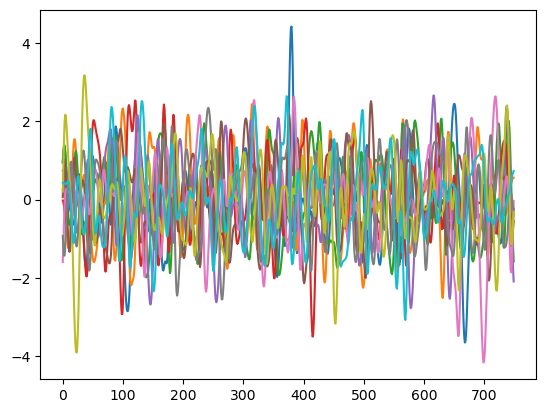

In [7]:
plt.plot(components_masked)